 In train-test-split you keep aside (70%,80%) of data for training and remaining for testing the model, but what if the data points that can bring some pattern is in test dataset and you end up losing it? 

Also when you split the data with some random_state and calculate the accuracy or any other metric it changes with change in random_state, in this case how would you decide what's the maximum and minimum accuracy,error your model produce?

There comes Cross-validation as our Saviour. Wonder how?

# WHAT IS CROSS-VALIDATION?


Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.



Cross-validation starts by shuffling the data (to prevent any unintentional ordering errors) and splitting it into k folds. Then k models are fit on k−1 of the data (called the training split) and evaluated on 1/k of the data (called the test split). The results from each evaluation are averaged together for a final score, then the final model is fit on the entire dataset for operationalization.

This way there's no leaving out any part of dataset covering all trends!

# METHODS OF CROSS-VALIDATION

# 1) VALIDATION

In this method, we perform training on the 50% of the given data-set and rest 50% is used for the testing purpose. The major drawback of this method is that we perform training on the 50% of the dataset, it may possible that the remaining 50% of the data contains some important information which we are leaving while training our model i.e higher bias.

# 2) LOOCV (LEAVE ONE OUT CROSS-VALIDATION)

In this method, we perform training on the whole data-set but leaves only one data-point of the available data-set and then iterates for each data-point. Suppose you have 1000 records in your dataset and in this method you leave out one data point and use the rest 999 records for validation. In this way the validation is run for 1000 times and what if you have millions of records? Would you run million times? That's practically impossible!

An advantage of using this method is that we make use of all data points and hence it is low bias. The major drawback of this method is that it leads to higher variation in the testing model as we are testing against one data point. If the data point is an outlier it can lead to higher variation. Another drawback is it takes a lot of execution time as it iterates over ‘the number of data points’ times.

From the above two validation methods, we’ve learnt:

We should train the model on a large portion of the dataset. Otherwise we’ll fail to read and recognise the underlying trend in the data. This will eventually result in a higher bias.

We also need a good ratio of testing data points. As we have seen above, less amount of data points can lead to a variance error while testing the effectiveness of the model.

We should iterate on the training and testing process multiple times. We should change the train and test dataset distribution. This helps in validating the model effectiveness properly.

Do we have a method which takes care of all these 3 requirements?

# 3) K-FOLD CROSS-VALIDATION

 That method is known as “k-fold cross validation”.

It’s easy to follow and implement. Below are the steps for it:


* Randomly split your entire dataset into "kfolds".

* For each k-fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold.

* Record the error you see on each of the predictions.

* Repeat this until each of the k-folds has served as the test set.

* The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model.

Now you might wonder what could be the way to decide the value of k?

Well let me tell you there's no thumb rule for choosing the value of k and it completel depends on size of your dataset. However k=10 is considered to be ideal value as more than 10 would really take longer to validate.

Higher the value of K leads to LOOCV approach where you will incure high computation costs.

Lower value of K leads to validation approach where you will lose the important data.

# 4) STRATIFIED CROSS-VALIDATION

Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole. For example, in a binary classification if our target labels are imbalanced,it is advisory to arrange the data such that in every fold, each class comprises of about half the instances. If this is not covered, the model learns only to predict the majority label and when unseen data is fed it will predict only majority label which might deteriorate model's predictions.

# 5) ADVERSARIAL VALIDATION

Many data science competitions suffer from a test set being markedly different from a training set (a violation of the “identically distributed” assumption). It is then difficult to make a representative validation set. As a result, the internal cross-validation techniques might give scores that are not even in the ballpark of the test score. In such cases, adversarial validation offers an ideal solution.

The general idea is to check the degree of similarity between training and tests in terms of feature distribution. If It does not seem to be the case, we can suspect they are quite different. This intuition can be quantified by combining train and test sets, assigning 0/1 labels (0 – train, 1-test) and evaluating a binary classification task. Specifically, we’ll run the distinguishing classifier in cross-validation mode, to get predictions for all training examples. Then we’ll see which training examples are misclassified as test and use them for validation.

To be more precise, we’ll choose a number of misclassified examples that the model was most certain about. It means that they look like test examples but in reality are training examples. Cross-validation provides predictions for all the training points. Now we’d like to sort the training points by their estimated probability of being test examples. We did the ascending sort, so for validation we take a desired number of examples from the end. We will note that if differences between models in validation are pretty slim.

Steps to do Adversarial Validation:

* Remove the target variable from the train set
* Create a new target variable which is 1 for each row in the train set, and 0 for each row in the test set
* Combine the train and test datasets
* Using the above newly created target variable, fit a classification model and predict probabilities for each row to be in the test set

# ADVANTAGES OF CROSS-VALIDATION

* More accurate estimate of out-of-sample accuracy.
* More “efficient” use of data as every observation is used for both training and testing.

In [1]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

E:\ANAXONDA\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\ANAXONDA\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
E:\ANAXONDA\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [4]:
pip install yellowbrick==1.3.post1


  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: six in e:\anaxonda\lib\site-packages (from cycler>=0.10.0->yellowbrick==1.3.post1) (1.16.0)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.2
    Uninstalling numpy-1.21.2:



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'e:\\anaxonda\\lib\\site-packages\\numpy\\.libs\\libopenblas.xwydx2ikjw2nmtwsfyngfuwkqu3lytcz.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [5]:
from yellowbrick.model_selection import cv_scores
from yellowbrick.model_selection import CVScores

In [6]:
data = pd.read_csv("diabetes.csv")

In [7]:
x1 = data.drop('Outcome', axis=1).values 
y1 = data['Outcome'].values

# 1)  HOLD-OUT VALIDATION APPROACH

In [8]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x1, y1, test_size=0.30, random_state=100)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 75.76%


In [9]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x1, y1, test_size=0.30, random_state=22)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 77.06%


We can see that the accuracy for the model on the test data is approximately 77% with randomstate=22.

# 2) LEAVE ONE OUT VALIDATION

In [10]:
loocv = LeaveOneOut()
model_loocv = LogisticRegression()
results_loocv = cross_val_score(model_loocv, x1, y1, cv=loocv)
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

Accuracy: 77.86%


# 3) K-FOLD CROSS VALIDATION APPROACH

In [12]:
for k in range(2,11):

    kfold = KFold(n_splits=k,shuffle=True, random_state=100)
    model_kfold = LogisticRegression()
    results_kfold = model_selection.cross_val_score(model_kfold, x1, y1, cv=kfold)
    print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 76.82%
Accuracy: 77.60%
Accuracy: 77.86%
Accuracy: 77.61%
Accuracy: 78.12%
Accuracy: 77.74%
Accuracy: 77.60%
Accuracy: 77.36%
Accuracy: 77.47%


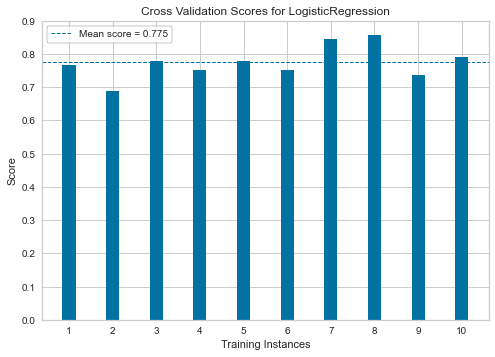

In [16]:
# Create a cross-validation strategy
cv = KFold(n_splits=10,shuffle = True , random_state=100)

# Instantiate the classification model and visualizer
model = LogisticRegression()

# Fit the data to the visualizer
visualizer = cv_scores(model, x1, y1, cv=cv, scoring='accuracy')

# 4) STRATIFIED K-FOLD CROSS VALIDATION APPROACH

In [17]:
for k in range(2,11):

    skfold = StratifiedKFold(n_splits=k,shuffle= True, random_state=100)
    model_skfold = LogisticRegression()
    results_skfold = cross_val_score(model_skfold, x1, y1, cv=skfold)

    print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 75.91%
Accuracy: 75.52%
Accuracy: 76.69%
Accuracy: 77.09%
Accuracy: 77.34%
Accuracy: 76.95%
Accuracy: 77.34%
Accuracy: 77.10%
Accuracy: 77.61%


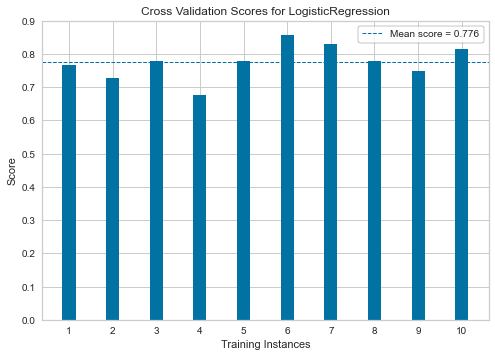

<AxesSubplot:title={'center':'Cross Validation Scores for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [19]:
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=10,shuffle = True, random_state=100)

# Instantiate the classification model and visualizer
model = LogisticRegression()
visualizer = CVScores(model, cv=cv, scoring='accuracy')

# Fit the data to the visualizer
visualizer.fit(x1, y1)

# Finalize and render the figure
visualizer.show()    

# 5) SHUFFLE SPLIT APPROACH

In [27]:
for k in range(2,11):

    kfold2 = StratifiedKFold(n_splits=k, shuffle=True, random_state=100)
    model_shufflecv = LogisticRegression()
    results_4 = model_selection.cross_val_score(model_shufflecv, x1, y1, cv=kfold2)
    print("Accuracy: %.2f%% (%.2f%%)" % (results_4.mean()*100.0, results_4.std()*100.0))

Accuracy: 75.91% (4.04%)
Accuracy: 75.52% (2.44%)
Accuracy: 76.69% (5.16%)
Accuracy: 77.09% (3.90%)
Accuracy: 77.34% (3.16%)
Accuracy: 76.95% (3.99%)
Accuracy: 77.34% (3.85%)
Accuracy: 77.10% (4.79%)
Accuracy: 77.61% (4.95%)


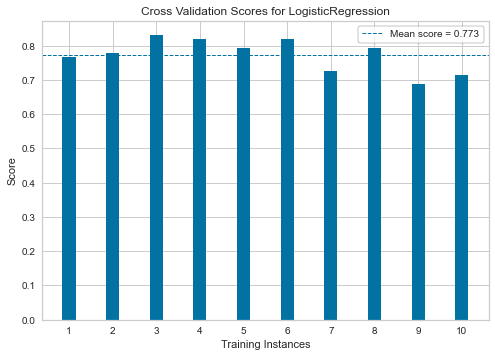

<AxesSubplot:title={'center':'Cross Validation Scores for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [28]:
# Create a cross-validation strategy
cv = ShuffleSplit(n_splits=10, random_state=100)

# Instantiate the classification model and visualizer
model = LogisticRegression()
visualizer = CVScores(model, cv=cv, scoring='accuracy')

# Fit the data to the visualizer
visualizer.fit(x1, y1)

# Finalize and render the figure
visualizer.show()  